In [47]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import keras as k
import keras.layers as l
import random

# Get dataset

In [48]:
DIM = 100

In [49]:
dataset_1 = '/mnt/data/deepfake/datasets/faces/Actor_01/'
dataset_2 = '/mnt/data/deepfake/datasets/faces/Actor_02/'

In [50]:
def get_pics(path, lim = 1000): 
    pics = []
    for i,pic in enumerate(os.listdir(path)):
        gray = cv.cvtColor(cv.imread(path + pic), cv.COLOR_BGR2GRAY)
        pics.append(gray)
        
        if i == lim:break
    return pics

In [51]:
def resize_pics(pics):
    resize = []
    for pic in pics:
        resize.append(cv.resize(pic, (DIM, DIM)))
    return np.array(resize)

In [52]:
pics_a = get_pics(dataset_1)
pics_b = get_pics(dataset_2)

In [53]:
len(pics_b)

1001

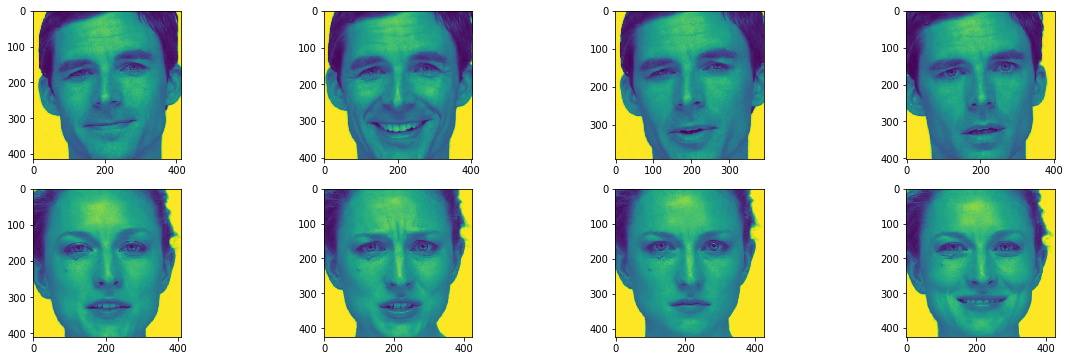

In [54]:
plt.figure(figsize=(20,6))
for i in range(1,5):
    plt.subplot(2, 4, i)
    i_pic = random.randint(0,len(pics_b))
    plt.imshow(pics_a[i_pic])
    
    plt.subplot(2,4,4+i)
    plt.imshow(pics_b[i_pic])
plt.show()

In [55]:
pics_a = resize_pics(pics_a)
pics_b = resize_pics(pics_b)

In [56]:
pics_a.shape, pics_b.shape

((1001, 100, 100), (1001, 100, 100))

In [57]:
Xa = pics_a / 255.
Xb = pics_b / 255.

In [58]:
def mat2flat(pics):
    return pics.reshape((len(pics), DIM*DIM))
def flat2mat(pics):
    return pics.reshape((len(pics), DIM, DIM))

In [59]:
Xa = mat2flat(Xa)
Xb = mat2flat(Xb)

In [60]:
Xa.shape,Xb.shape

((1001, 10000), (1001, 10000))

# Dense Network

In [61]:
train_xa, test_xa = Xa[0:int(len(Xa)*0.9)], Xa[int(len(Xa)*0.9):]
train_xb, test_xb = Xb[0:int(len(Xb)*0.9)], Xb[int(len(Xb)*0.9):]

In [62]:
input_layer = l.Input(shape = (DIM * DIM,))
encoded = l.Dense(32, activation='relu')(input_layer)
decoded_a = l.Dense(DIM*DIM, activation = "sigmoid")(encoded)
decoded_b = l.Dense(DIM*DIM, activation = "sigmoid")(encoded)
autoencodeur_a = k.Model(input_layer, decoded_a)
autoencodeur_b = k.Model(input_layer, decoded_b)
encodeur = k.Model(input_layer, encoded)


# create a placeholder for an encoded (32-dimensional) input
encoded_input = l.Input(shape=(32,))
# retrieve the last layer of the autoencoder model
decoder_a_layer = autoencodeur_a.layers[-1]
decoder_b_layer = autoencodeur_b.layers[-1]

# create the decoder model
decodeur_a = k.Model(encoded_input, decoder_a_layer(encoded_input))
decodeur_b = k.Model(encoded_input, decoder_b_layer(encoded_input))

In [63]:
autoencodeur_a.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencodeur_b.compile(optimizer='adadelta', loss='binary_crossentropy')

In [65]:
for _ in range(200):
    autoencodeur_a.fit(train_xa, train_xa, epochs=1)
    autoencodeur_b.fit(train_xb, train_xb, epochs=1)

Epoch 1/1
900/900 [==============================] - 0s 204us/step - loss: 0.5481
Epoch 1/1
900/900 [==============================] - 0s 200us/step - loss: 0.5353
Epoch 1/1
900/900 [==============================] - 0s 199us/step - loss: 0.5480
Epoch 1/1
900/900 [==============================] - 0s 203us/step - loss: 0.5353
Epoch 1/1
900/900 [==============================] - 0s 197us/step - loss: 0.5480
Epoch 1/1
900/900 [==============================] - 0s 204us/step - loss: 0.5352
Epoch 1/1
900/900 [==============================] - 0s 201us/step - loss: 0.5480
Epoch 1/1
900/900 [==============================] - 0s 205us/step - loss: 0.5352
Epoch 1/1
900/900 [==============================] - 0s 212us/step - loss: 0.5479
Epoch 1/1
900/900 [==============================] - 0s 212us/step - loss: 0.5352
Epoch 1/1
900/900 [==============================] - 0s 213us/step - loss: 0.5479
Epoch 1/1
900/900 [==============================] - 0s 212us/step - loss: 0.5352
Epoch 1/1
900/90

900/900 [==============================] - 0s 200us/step - loss: 0.5339
Epoch 1/1
900/900 [==============================] - 0s 200us/step - loss: 0.5449
Epoch 1/1
900/900 [==============================] - 0s 200us/step - loss: 0.5339
Epoch 1/1
900/900 [==============================] - 0s 201us/step - loss: 0.5449
Epoch 1/1
900/900 [==============================] - 0s 203us/step - loss: 0.5339
Epoch 1/1
900/900 [==============================] - 0s 200us/step - loss: 0.5449
Epoch 1/1
900/900 [==============================] - 0s 202us/step - loss: 0.5339
Epoch 1/1
900/900 [==============================] - 0s 199us/step - loss: 0.5449
Epoch 1/1
900/900 [==============================] - 0s 203us/step - loss: 0.5339
Epoch 1/1
900/900 [==============================] - 0s 199us/step - loss: 0.5448
Epoch 1/1
900/900 [==============================] - 0s 199us/step - loss: 0.5339
Epoch 1/1
900/900 [==============================] - 0s 205us/step - loss: 0.5448
Epoch 1/1
900/900 [=======

900/900 [==============================] - 0s 201us/step - loss: 0.5335
Epoch 1/1
900/900 [==============================] - 0s 200us/step - loss: 0.5439
Epoch 1/1
900/900 [==============================] - 0s 211us/step - loss: 0.5335
Epoch 1/1
900/900 [==============================] - 0s 200us/step - loss: 0.5439
Epoch 1/1
900/900 [==============================] - 0s 200us/step - loss: 0.5335
Epoch 1/1
900/900 [==============================] - 0s 200us/step - loss: 0.5439
Epoch 1/1
900/900 [==============================] - 0s 204us/step - loss: 0.5335
Epoch 1/1
900/900 [==============================] - 0s 199us/step - loss: 0.5439
Epoch 1/1
900/900 [==============================] - 0s 199us/step - loss: 0.5335
Epoch 1/1
900/900 [==============================] - 0s 199us/step - loss: 0.5439
Epoch 1/1
900/900 [==============================] - 0s 203us/step - loss: 0.5335
Epoch 1/1
900/900 [==============================] - 0s 201us/step - loss: 0.5439
Epoch 1/1
900/900 [=======

900/900 [==============================] - 0s 205us/step - loss: 0.5332


In [23]:
test_img = test_xa[50]

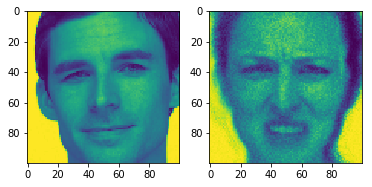

In [24]:
plt.subplot(1,2,1)
plt.imshow(test_img.reshape(100,100))
plt.subplot(1,2,2)
pred = decodeur_b.predict(encodeur.predict(np.array([test_img])))
plt.imshow(pred[0].reshape(100,100))

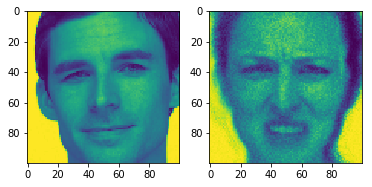

In [25]:
plt.subplot(1,2,1)
plt.imshow(test_img.reshape(100,100))
plt.subplot(1,2,2)
pred = decodeur_b.predict(encodeur.predict(np.array([test_img])))
plt.imshow(pred[0].reshape(100,100))

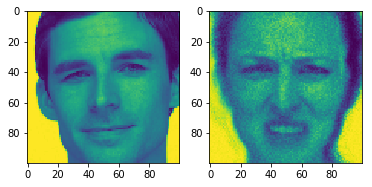

In [26]:
plt.subplot(1,2,1)
plt.imshow(test_img.reshape(100,100))
plt.subplot(1,2,2)
pred = autoencodeur_b.predict(np.array([test_img]))
plt.imshow(pred[0].reshape(100,100))

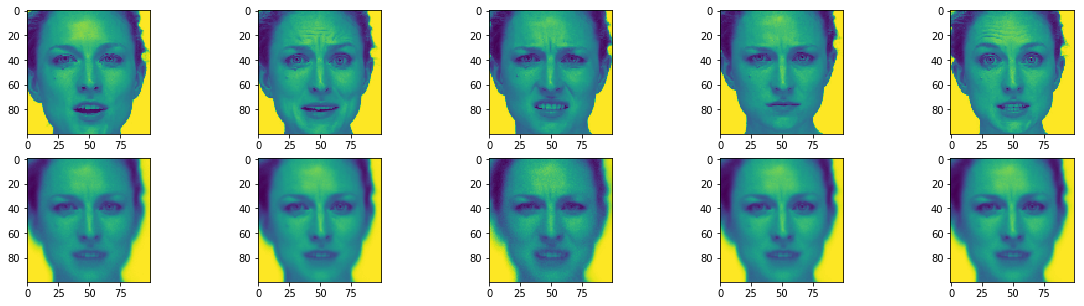

In [29]:
plt.figure(figsize=(20,5))
for i in range(1,6):
    plt.subplot(2, 5, i)
    i_pic = random.randint(0,len(test_xb))
    plt.imshow(test_xb[i_pic].reshape((100,100)))
    
    plt.subplot(2,5, i+5)
    pred = autoencodeur_b.predict(np.array([test_xb[i_pic]]))
    plt.imshow(pred.reshape((100,100)))
    
plt.show()

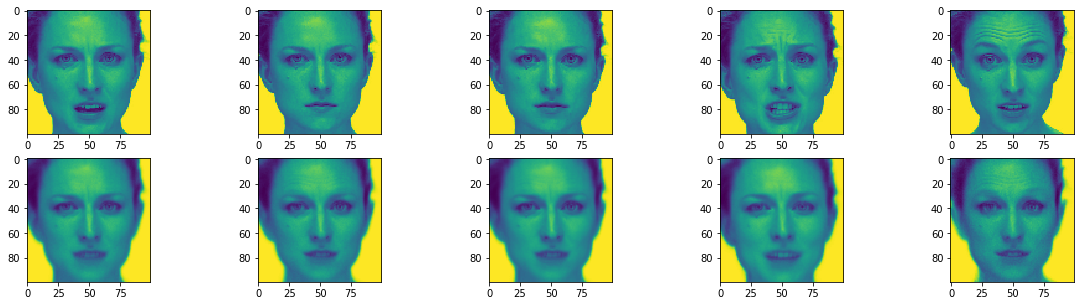

In [43]:
plt.figure(figsize=(20,5))
for i in range(1,6):
    plt.subplot(2, 5, i)
    i_pic = random.randint(0,len(test_xb))
    plt.imshow(test_xb[i_pic].reshape((100,100)))
    
    plt.subplot(2,5, i+5)
    pred = autoencodeur_b.predict(np.array([test_xb[i_pic]]).reshape((1,100*100)))
    plt.imshow(pred.reshape((100,100)))
    
plt.show()

In [ ]:
1+1

# CNN

In [31]:

input_img = l.Input(shape=(100, 100, 1))  # adapt this if using `channels_first` image data format

x = l.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = l.MaxPooling2D((2, 2), padding='same')(x)
x = l.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = l.MaxPooling2D((2, 2), padding='same')(x)
x = l.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = l.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

xa = l.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
xa = l.UpSampling2D((2, 2))(xa)
xa = l.Conv2D(8, (3, 3), activation='relu', padding='same')(xa)
xa = l.UpSampling2D((2, 2))(xa)
xa = l.Conv2D(16, (3, 3), activation='relu')(xa)
xa = l.UpSampling2D((2, 2))(xa)
decoded_a = l.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(xa)

xb = l.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
xb = l.UpSampling2D((2, 2))(xb)
xb = l.Conv2D(8, (3, 3), activation='relu', padding='same')(xb)
xb = l.UpSampling2D((2, 2))(xb)
xb = l.Conv2D(16, (3, 3), activation='relu')(xb)
xb = l.UpSampling2D((2, 2))(xb)
decoded_b = l.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(xb)

autoencoder_a = k.Model(input_img, decoded_a)
autoencoder_b = k.Model(input_img, decoded_b)

encoder = k.Model(input_img, encoded)

autoencoder_a.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder_b.compile(optimizer='adadelta', loss='binary_crossentropy')


In [32]:
autoencoder_a.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 8)         0   

In [33]:
train_xa = train_xa.reshape((len(train_xa), 100,100,1))
train_xb = train_xb.reshape((len(train_xb), 100,100,1))
test_xa = test_xa.reshape((len(test_xa), 100,100,1))
test_xb = test_xb.reshape((len(test_xb), 100,100,1))

In [35]:
train_xa.shape

(900, 100, 100, 1)

In [41]:
for i in range(100):
    if i%10 == 0: print(i)
    autoencoder_a.fit(train_xa, train_xa, epochs=1)
    autoencoder_b.fit(train_xb, train_xb, epochs=1)

0
Epoch 1/1
900/900 [==============================] - 1s 890us/step - loss: 0.5345
Epoch 1/1
900/900 [==============================] - 1s 762us/step - loss: 0.5342
Epoch 1/1
900/900 [==============================] - 1s 755us/step - loss: 0.5344
Epoch 1/1
900/900 [==============================] - 1s 776us/step - loss: 0.5342
Epoch 1/1
900/900 [==============================] - 1s 761us/step - loss: 0.5340
Epoch 1/1
900/900 [==============================] - 1s 786us/step - loss: 0.5343
Epoch 1/1
900/900 [==============================] - 1s 767us/step - loss: 0.5341
Epoch 1/1
900/900 [==============================] - 1s 761us/step - loss: 0.5343
Epoch 1/1
900/900 [==============================] - 1s 748us/step - loss: 0.5337
Epoch 1/1
900/900 [==============================] - 1s 771us/step - loss: 0.5339
Epoch 1/1
900/900 [==============================] - 1s 764us/step - loss: 0.5344
Epoch 1/1
900/900 [==============================] - 1s 775us/step - loss: 0.5341
Epoch 1/1
900/

900/900 [==============================] - 1s 751us/step - loss: 0.5320
Epoch 1/1
900/900 [==============================] - 1s 766us/step - loss: 0.5318


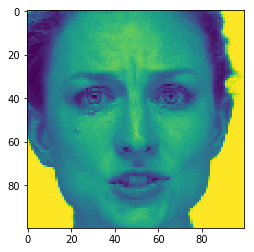

In [204]:
plt.imshow(test_img.reshape((100,100)))

In [208]:
code = encoder.predict(test_img.reshape(1,100,100,1))

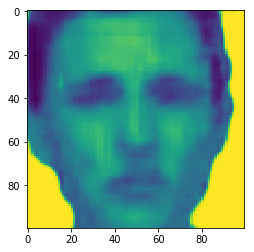

In [211]:
plt.imshow(decoder_a.predict(code).reshape(100,100))

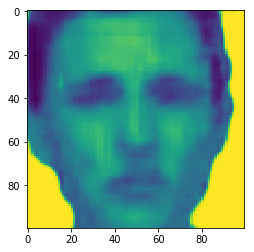

In [213]:
plt.imshow(autoencoder_a.predict(test_img.reshape(1,100,100,1)).reshape(100,100))

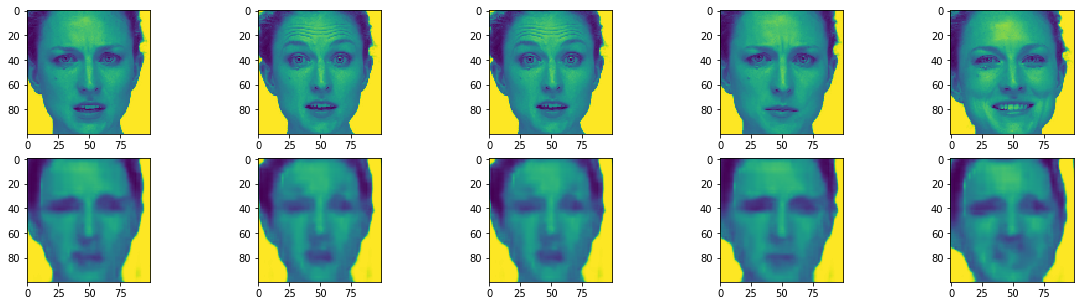

In [42]:
plt.figure(figsize=(20,5))
for i in range(1,6):
    plt.subplot(2, 5, i)
    i_pic = random.randint(0,len(test_xb))
    plt.imshow(test_xb[i_pic].reshape((100,100)))
    
    plt.subplot(2,5, i+5)
    pred = autoencoder_a.predict(np.array([test_xb[i_pic]]))
    plt.imshow(pred.reshape((100,100)))
    
plt.show()

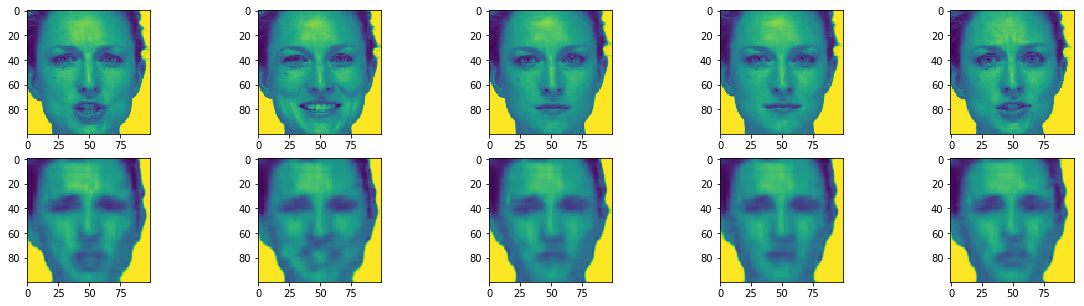

In [202]:
plt.figure(figsize=(20,5))
for i in range(1,6):
    i_pic = random.randint(0,len(test_xa))
    test_img = test_xb[i_pic]
    
    plt.subplot(2, 5, i)
    plt.imshow(test_img.reshape((100,100)))
    
    plt.subplot(2,5, i+5)
    pred = autoencoder_a.predict(np.array([test_img]))
    plt.imshow(pred.reshape((100,100)))
    
plt.show()

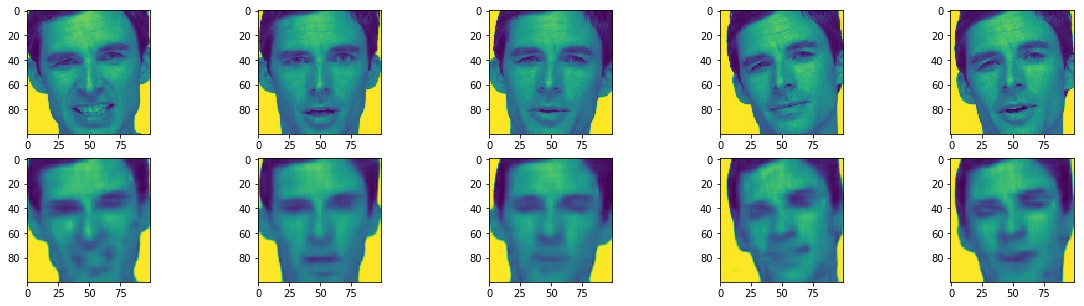

In [199]:
plt.figure(figsize=(20,5))
for i in range(1,6):
    i_pic = random.randint(0,len(test_xa))
    test_img = test_xa[i_pic]
    
    plt.subplot(2, 5, i)
    plt.imshow(test_img.reshape((100,100)))
    
    plt.subplot(2,5, i+5)
    pred = autoencoder_a.predict(np.array([test_img]))
    plt.imshow(pred.reshape((100,100)))
    
plt.show()

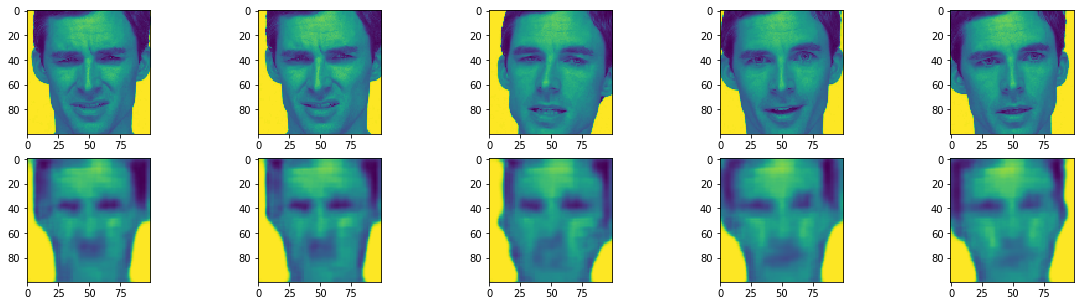

In [176]:
plt.figure(figsize=(20,5))
for i in range(1,6):
    plt.subplot(2, 5, i)
    i_pic = random.randint(0,len(test_xa))
    plt.imshow(test_xa[i_pic].reshape((100,100)))
    
    plt.subplot(2,5, i+5)
    pred = decoder_b.predict(encoder.predict(np.array([test_xa[i_pic]])))
    plt.imshow(pred.reshape((100,100)))
    
plt.show()